In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

import plotly.express as px
import calendar
import july
from july.utils import date_range
from july.plot import calendar_plot
from matplotlib.colors import LinearSegmentedColormap

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [2]:
data = pd.read_csv('sakura_final_df.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Location                 1972 non-null   object 
 1   Observation_Status       1972 non-null   object 
 2   year                     1972 non-null   int64  
 3   peak_bloom_date          1972 non-null   object 
 4   bloom_day_of_year        1972 non-null   float64
 5   lat                      1972 non-null   float64
 6   long                     1972 non-null   float64
 7   Average temperature (℃)  1972 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 123.4+ KB


In [4]:
data['peak_bloom_date'] = pd.to_datetime(data['peak_bloom_date'])

In [5]:
data.head()

Location Observation_Status  year peak_bloom_date  bloom_day_of_year  \
0  Abashiri           Observed  1991      1991-05-08              128.0   
1  Abashiri           Observed  1992      1992-05-13              134.0   
2  Abashiri           Observed  1993      1993-05-20              140.0   
3  Abashiri           Observed  1994      1994-05-13              133.0   
4  Abashiri           Observed  1995      1995-05-08              128.0   

         lat        long  Average temperature (℃)  
0  44.017778  144.279722                     13.7  
1  44.017778  144.279722                     11.8  
2  44.017778  144.279722                      8.5  
3  44.017778  144.279722                      7.3  
4  44.017778  144.279722                     11.1

In [6]:
data.shape

(1972, 8)

In [7]:
# Define a color palette for sakura colors to use in this project
sakura_palette = {
    'Southern': '#FFB6C1',  # Light pink
    'Central': '#FF69B4',    # Hot pink
    'Northern': '#FF1493',   # Deep pink
    'Far-Northern': '#FFC0CB' # Pink
}

### Average Temperature vs. Peak Bloom Date

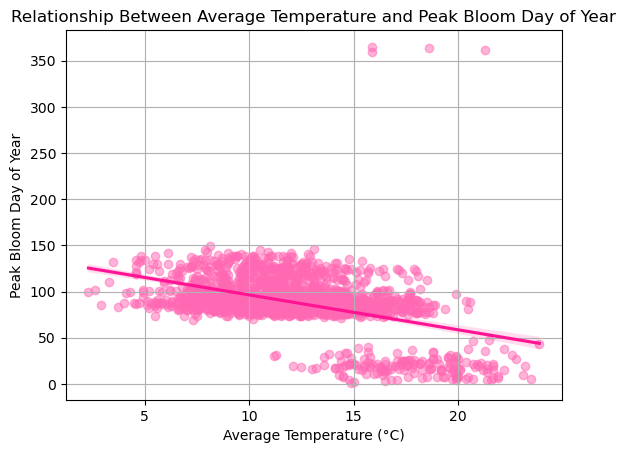

In [8]:
sns.regplot(data=data, x='Average temperature (℃)', y='bloom_day_of_year', scatter_kws={'alpha': 0.5, 'color': '#FF69B4'}, line_kws={'color': '#FF1493'})
plt.title('Relationship Between Average Temperature and Peak Bloom Day of Year')
plt.xlabel('Average Temperature (\u00B0C)')
plt.ylabel('Peak Bloom Day of Year')
plt.grid(True)
plt.margins(x=0.05, y=0.05)
plt.show()

This plot tells us that there's a general trend when it comes to temperatures and bloom timings, it looks like the lower the average temperature (cold locations) the later the peak blooming date. This pattern makes sense because it align with botanical understanding : cooler climates often delay flowering because the plants require a certain temperature threshold to be met before blooming.

We do notice 4 points at the top of the chart that might look like outliers at first glance because even though the average temperature for these points is relatively higher the peak blooming date is over 350 (mid-December) but as we recall from the previous section, we had exactly 4 data points where the blooming happened in december of the previous year. Just to be safe, we will replot our chart and anotate these points to double check our hypothesis and confirm that indeed these are not outliers.

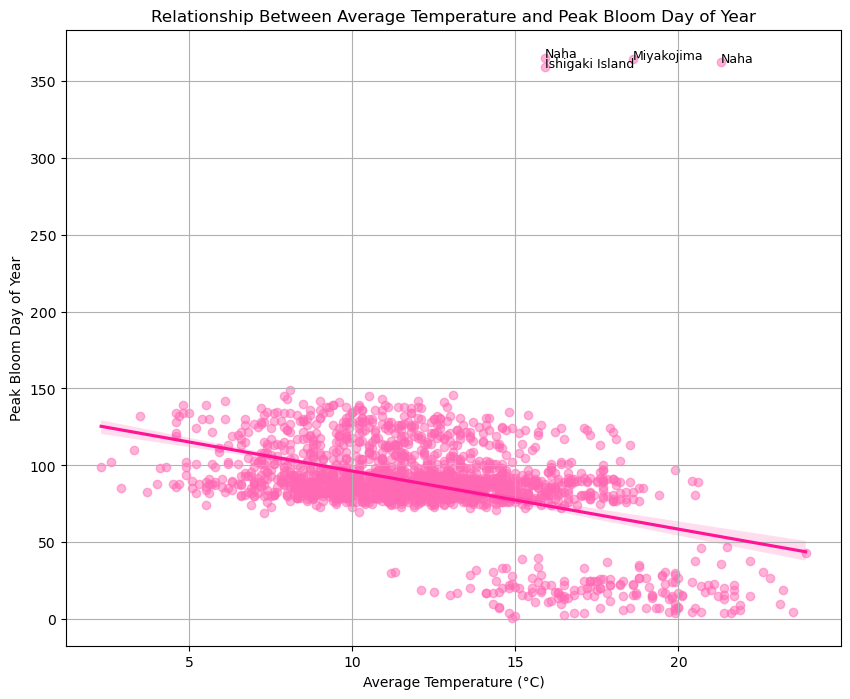

In [9]:
plt.figure(figsize=(10, 8))
sns.regplot(data=data, x='Average temperature (℃)', y='bloom_day_of_year', scatter_kws={'alpha': 0.5, 'color': '#FF69B4'}, line_kws={'color': '#FF1493'})
plt.title('Relationship Between Average Temperature and Peak Bloom Day of Year')
plt.xlabel('Average Temperature (\u00B0C)')
plt.ylabel('Peak Bloom Day of Year')
plt.grid(True)

# Annotating the points with bloom day > 350
for i in range(len(data)):
    if data['bloom_day_of_year'].iloc[i] > 350:
        plt.text(data['Average temperature (℃)'].iloc[i], data['bloom_day_of_year'].iloc[i], 
                 data['Location'].iloc[i], fontsize=9, color='black')
plt.margins(x=0.05, y=0.05)
plt.show()

As expected, the data points with bloom dates in December represent no other than Ishigaki Island, Miyakojima, and Naha, all of which are part of the Okinawa prefecture. These locations are situated in the southernmost region of Japan, characterized by a subtropical climate. The presence of blooming dates in December highlights the importance of considering seasonal and geographical context, and a quick google search confirmed our theory, it looks like the blooming of cherry blossoms in Japan follows a geographical trend, with the earliest cherry blossoms staring in the warmer southern regions of Okinawa around January (our data points were in late December so it follows the same trend), and reaching the northern cooler part by late May.

We will next have a closer look at the relationship between the locations and the blooming dates, to confirm this theory.


## Average Temperature vs. Peak Bloom Date

In [10]:
# lets first try and focus on one year 
year = 2023
df_filtered = data[data['year'] == year]



fig = px.scatter_geo(df_filtered,
                     lat='lat',
                     lon='long',
                     hover_name='Location',
                     hover_data={'year': True, 'peak_bloom_date': True, 'bloom_day_of_year': True},
                     color='bloom_day_of_year',  # Color by bloom day of the year
                     size='bloom_day_of_year',  
                     color_continuous_scale=px.colors.sequential.RdPu,  # Pink palette to match the theme
                     projection="natural earth")

# Set the map's center and zoom level so that the plot starts already zoomed in on Japan
fig.update_geos(
    center={"lat": 36.2048, "lon": 138.2529},
    projection_scale=5 
)
    
fig.update_layout(
    title=f'Cherry Blossom Blooming Dates in {year}',
    geo=dict(
        showland=True,
        landcolor="rgb(243, 243, 243)",
    ),
    margin={"r":0,"t":30,"l":0,"b":0}
)

fig.show()

As expected our initial theory has been proven, and it looks like indeed the blooming of cherry blossoms starts in the warmer southern areas of Japan and reaches the colder northern parts a few months later.

### Temporal Trends in Peak Bloom Dates

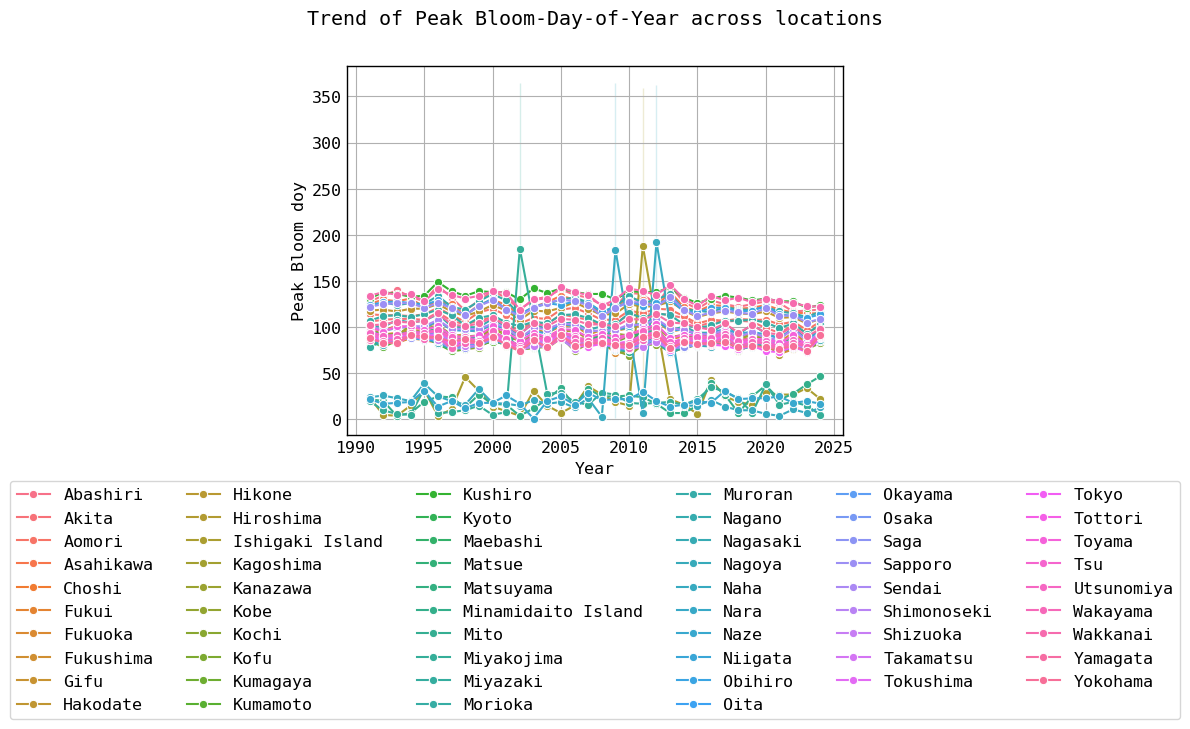

In [49]:
sns.lineplot(data=data, x='year', y='bloom_day_of_year', hue='Location', marker='o')
plt.title('Trend of Peak Bloom-Day-of-Year across locations')
plt.xlabel('Year')
plt.ylabel('Peak Bloom doy')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=6)
plt.grid(True)
plt.margins(x=0.05, y=0.05)
plt.show()


Looking at the temporal trends in peak bloom dates, we can notice that overall, the patterns are relatively consistent across different locations, with the exception of the four special points previously discussed. This consistency is a good sign because when it comes to time series analysis, it suggests that forecasts for future bloom dates are likely to be more reliable and closer to actual dates.

While previously we proved that there is a North-South gradient —where cherry blossoms bloom earlier in the south and later in the north— over one year, this plot confirms that this geographic trend remains consistent across different 'locations' over the years. In the next visualization, we will focus on a subset of locations (for easier analysis) from different regional clusters to further confirm the North-South gradient across multiple years.

Additionally, one other interesting point the plot highlights is the year-to-year variations in bloom dates at the same locations. We can see that certain years (1995 for example), show a collective delay in blooming across many locations. This trend may indicate annual climatic variations, such as cooler springs, which will be explored in another plot.

In [25]:
# choosing only a few locations 

# Lets define 4 regions, and randomly pick 4 locations in that region
# Note: the locations containing the December blooming dates will not be included for easier interpretation

region_mapping = { 
    'Southern': ['Miyazaki', 'Naze', 'Fukuoka', 'Minamidaito Island'],
    'Central': ['Tokyo', 'Kyoto', 'Hiroshima', 'Nagoya'],
    'Northern': ['Aomori', 'Akita', 'Yamagata', 'Nagano'],
    'Far-Northern': ['Sapporo', 'Hakodate', 'Abashiri', 'Wakkanai']
}

sakura_palette = {
    #'Southern': '#FC9483',  # Peach
    'Central': '#FC4C4E',   # Strawberry
    'Southern': '#C154C1',   # Purple
    'Northern': '#FFC0CB', # Pink 
    'Far-Northern': '#FF1493' # Deep Pink
}

all_locations = [location for locations in region_mapping.values() for location in locations]
filtered_data = data[data['Location'].isin(all_locations)]

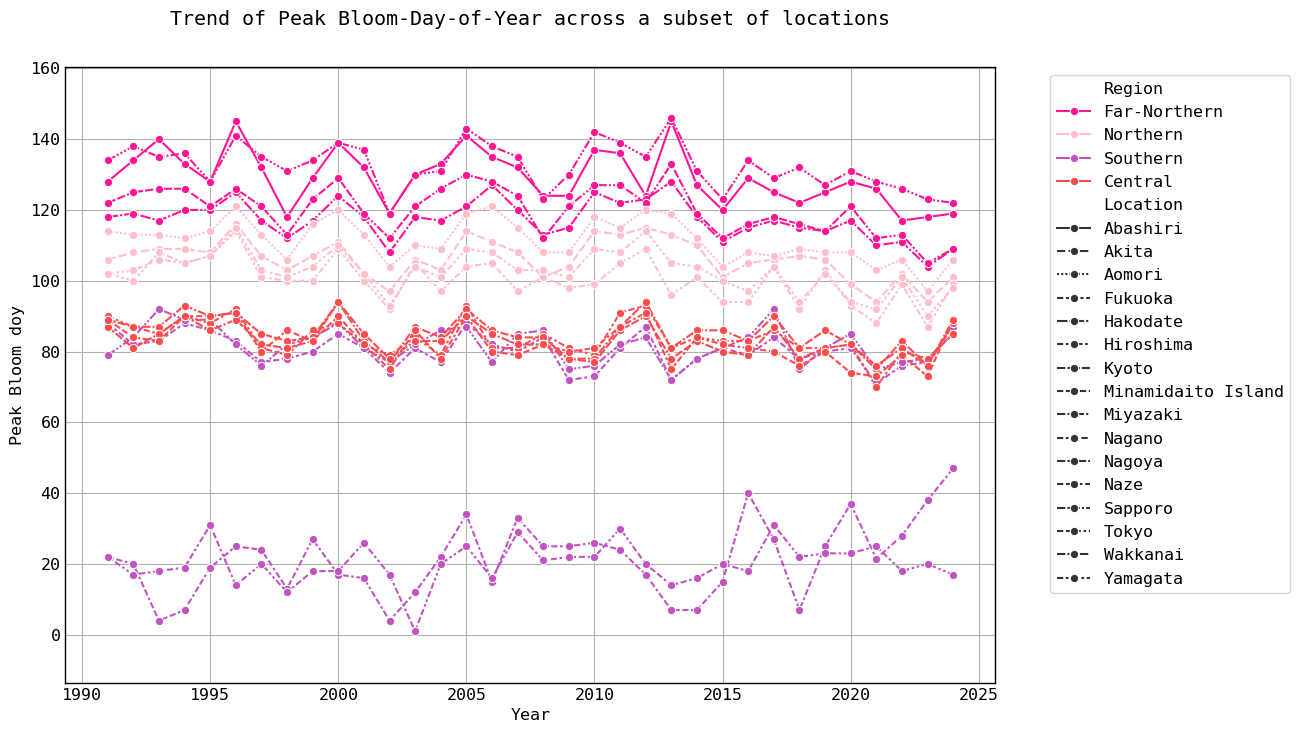

In [50]:
filtered_data.loc[:, 'Region'] = filtered_data['Location'].apply(lambda x: next((region for region, locations in region_mapping.items() if x in locations), None))

plt.figure(figsize=(12, 8))
sns.lineplot(data=filtered_data, x='year', y='bloom_day_of_year', hue='Region', palette=sakura_palette, marker='o', style='Location')
plt.title('Trend of Peak Bloom-Day-of-Year across a subset of locations')
plt.xlabel('Year')
plt.ylabel('Peak Bloom doy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.margins(x=0.05, y=0.1)
plt.show()

As expected, the blooming dates vary by region, with the 'Far-Northern' region experiencing the latest blooms and the 'Southern' region the earliest. What is more interesting though is the fact that there are significant local variations (within the same region). For instance, while peak blooming dates are generally similar across most regions, the 'Southern' region shows noticeable variability between the locations **Miyazaki and Fukuoka** versus **Naze and Minamidaito Island**.

Even though the locations are relatively close, the difference in blooming dates is quite interesting. For example, despite a latitude difference of only 3.56 degrees between Miyazaki and Naze, the blooming dates differ by almost 60 days. In contrast, locations with a similar latitude difference, like Aomori and Yamagata, show an offset of less than 10 days.

This raises the question, of *what other factors can contribute to these variations in blooming dates between locations in mainland Japan and those in Okinawa, where Naze is located?*. One possible explanation is the presence of different sakura tree species," the most common Cherry trees throughout Japan are called “Somei-Yoshino”, in contrast, Cherry trees in Okinawa are called Kanhizakura".

source: https://www.japan.travel/en/us/blog/take-a-break-from-winter-and-see-the-cherry-blossoms-bloom-early-in-okinawa/#:~:text=Its%20warm%20climate%20allows%20the,in%20Okinawa%20are%20called%20Kanhizakura.

### The effect of Average temperature

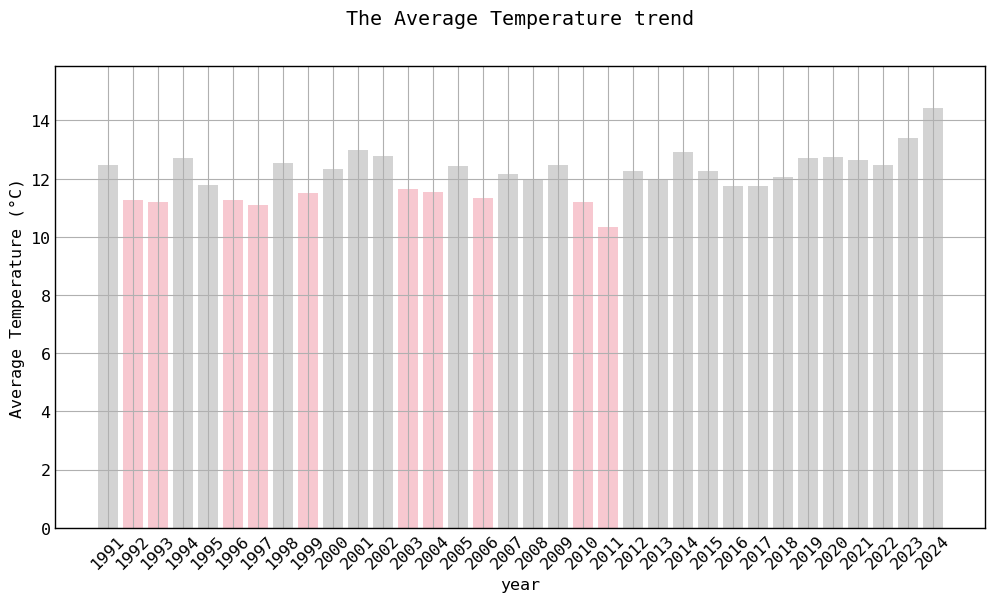

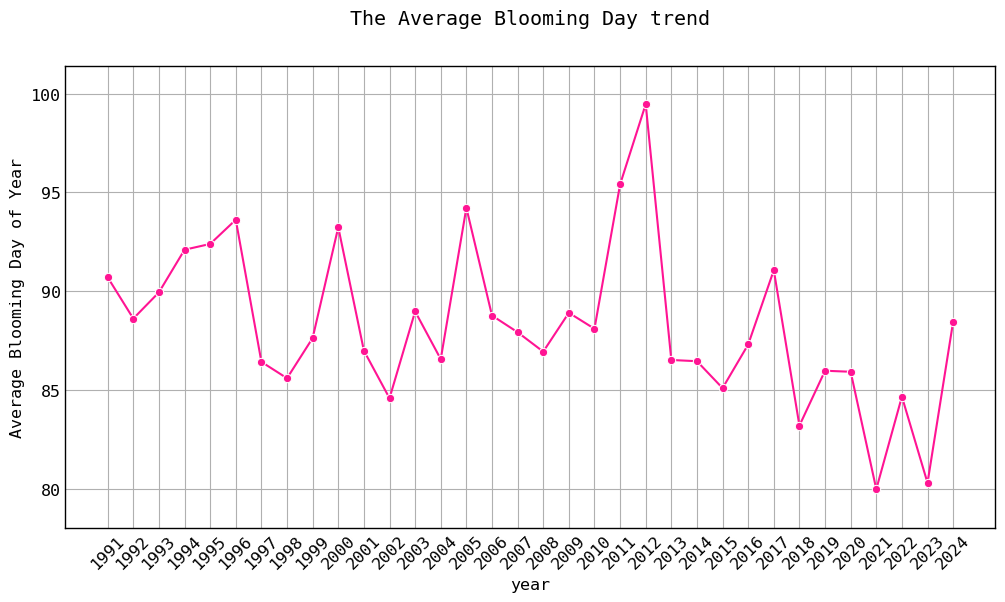

In [52]:
# Calculate the yearly average temperature and average blooming day of the year
yearly_data = data.groupby('year').agg(
    avg_temp=('Average temperature (℃)', 'mean'),
    avg_bloom_day=('bloom_day_of_year', 'mean')
).reset_index()

# Identify the 10 years with the lowest average temperatures
lowest_avg_temp_years = yearly_data.nsmallest(10, 'avg_temp')['year']

# average temperature trend
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_data, x='year', y='avg_temp', 
            palette=['pink' if year in lowest_avg_temp_years.values else 'lightgrey' for year in yearly_data['year']],
            hue='year', legend=False)
plt.ylabel('Average Temperature (\u00B0C)')
plt.title('The Average Temperature trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.margins(x=0.05, y=0.1)
plt.show()

# average blooming day trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_data, x='year', y='avg_bloom_day', color='#FF1493', marker='o')
plt.ylabel('Average Blooming Day of Year')
plt.title('The Average Blooming Day trend')
plt.xticks(yearly_data['year'], rotation=45)
plt.grid(True)
plt.margins(x=0.05, y=0.1)
plt.show()

The visualization above provides a back to back comparison, between the trends over time in yearly average temperature across Japan and the trends in yearly average blooming days. The motivation behind this inspection was to try and see if I could spot any direct relationship between cold temperatures and delayed blooming. The first plot also includes the ten years with the lowest average temperatures, highlighted in pink.

Initially, what I expected to see was that years that witnessed relatively cold springs would be the ones with delayed blossoms. However, the trend that I noticed instead was that the years with delayed blooming generally are not necessarily cold but are often preceded by one or two cold years. As an example, the year 2012 had the highest average blooming day, and the years 2011 and 2010 fall under the years with noticeably low temperatures. The same logic also goes for years 1994, 1995, 2000, and 2005 which all had an average blooming day of over 92, and were also all proceeded by colder springs. So this enables us to say that the colder the current spring is, the later the blooming might take place during the following year.

On a side note, we can also notice that over the past few years, average temperatures have been rising, most likely due to climate change, which also resulted in earlier blooming dates. This will most likely affect the accuracy of our peak boom date predictions.


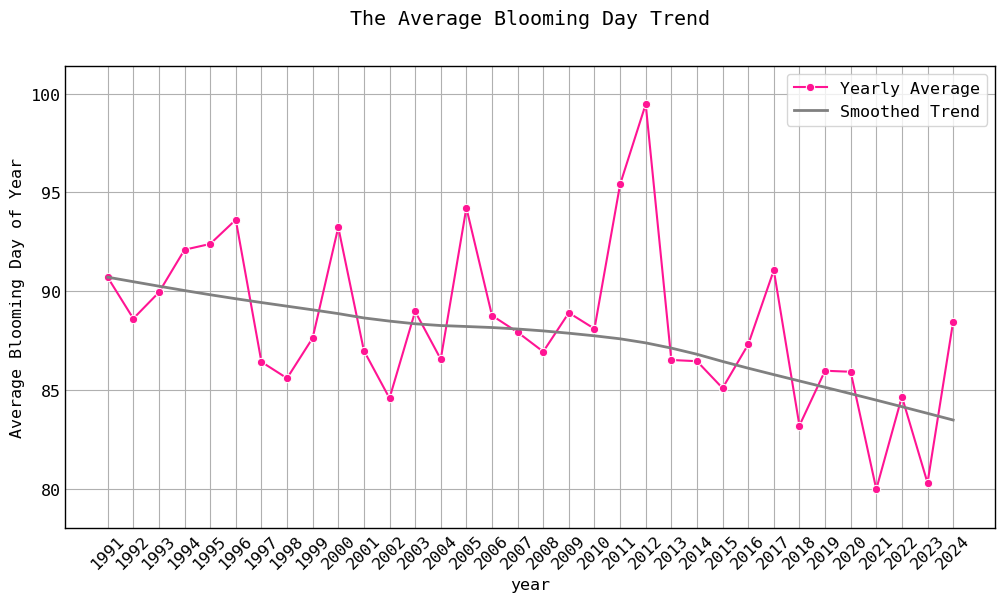

In [53]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=yearly_data, x='year', y='avg_bloom_day', color='#FF1493', marker='o', label='Yearly Average')

# Add LOWESS smoothed line with confidence interval
sns.regplot(data=yearly_data, x='year', y='avg_bloom_day', scatter=False, lowess=True, 
            color='grey', label='Smoothed Trend', 
            line_kws={'linestyle': '-', 'linewidth': 2}
            )

plt.ylabel('Average Blooming Day of Year')
plt.title('The Average Blooming Day Trend')
plt.xticks(yearly_data['year'], rotation=45)
plt.grid(True)
plt.legend()
plt.margins(x=0.05, y=0.1)
plt.show()

As we mentioned earlier, the average blooming date trend showed what looked like a downward trend. By applying a smoothing technique such as the Locally Weighted Scatterplot Smoothing curve (LOWESS), which is easily provided by seaborn, we added a smoothed line to the plot. This line now provides a clear view of the trend over time and highlights the strong shifts in the average blooming dates. The smoothed line shows a significant decline, especially in recent years, and so it supports the observation of a trend towards earlier blooming, following effects of rising temperatues.

### Correlation Matrix Heatmap

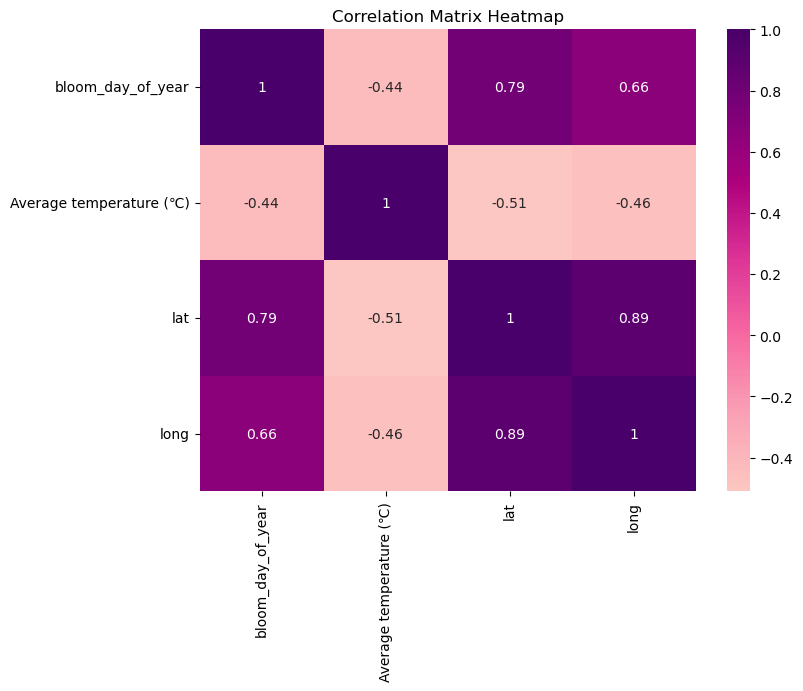

In [144]:
correlation_matrix = data[['bloom_day_of_year', 'Average temperature (℃)', 'lat', 'long']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdPu', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

The correlation matrix above will help us identify relationships between the data attributes and most importantly further confirm some of our initial findings : 

- **Bloom day of the year vs. Average Temperature (℃):** negative correlation of 0.44
  
  This value indicates a moderate negative correlation, which shows that yes temperature does affect the blooming dates, with higher temperatures resulting in earlier blooming. However, since the correlation is not quite strong, this also implies that the effect of temperature is not the only influencing factor. Other variables might have a stronger influence, or maybe it is the combination of warm temperatures among other factors that ultimately determines the timing of blooming.

- **Bloom day of the year vs. Latitude (lat):** positive correlation 0f 0.79 
  
  This value indicates a strong positive correlation, which only further confirms our initial conclusion about how locations further north (higher latitude) witness later blooming. This, coupled with the negative correlation of 0.51 between latitude and average temperature can prove that points further away from the equator tend to (though not always) be relatively colder, which ultimately affects blooming dates. As a result, blossoms tend to appear later in northern regions compared to southern ones.

- **Bloom day of the year vs. Longitude (long):** positive correlation 0f 0.66

  This relatively moderate correlation is quite intriguing  because it suggests that in some regions we can see a west-east gradient in blooming dates. This subtle effect might be a sign of regional climatic or geographical influences that could be affecting the timing of blooming, which we might not have fully accounted for.

### Blooming days heatmap

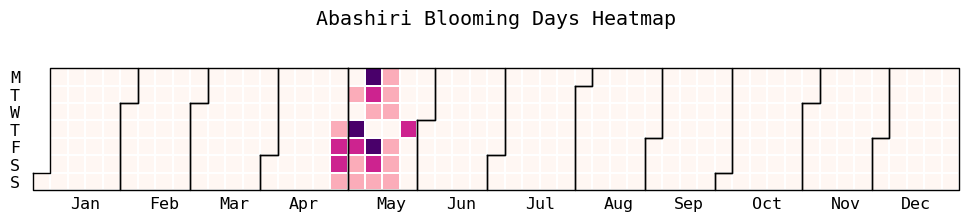

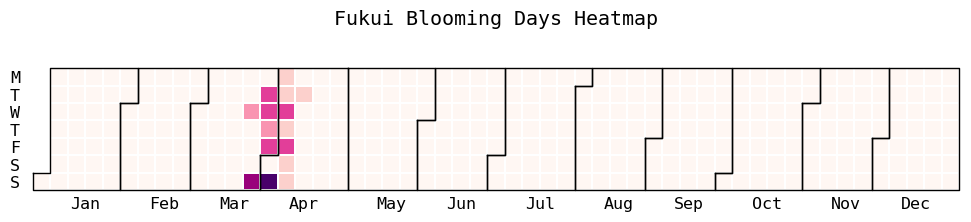

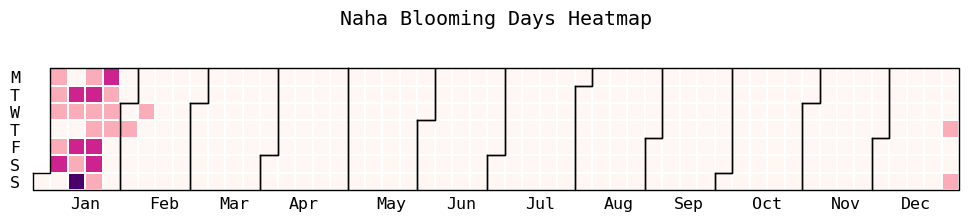

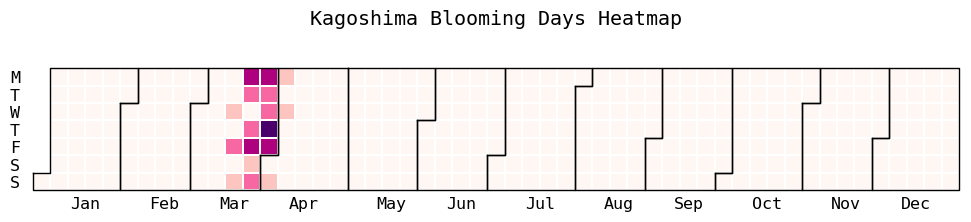

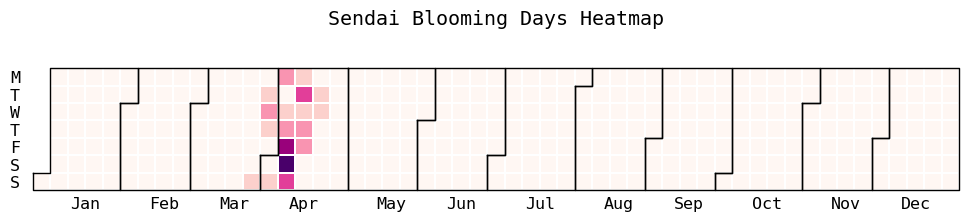

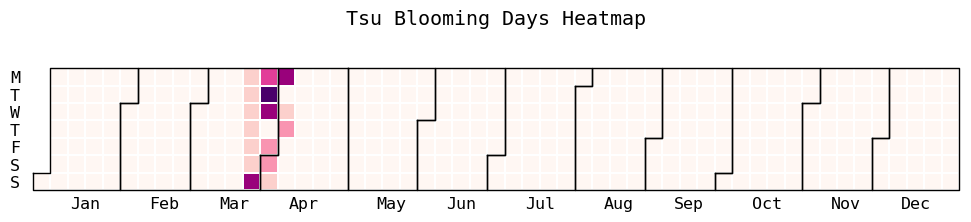

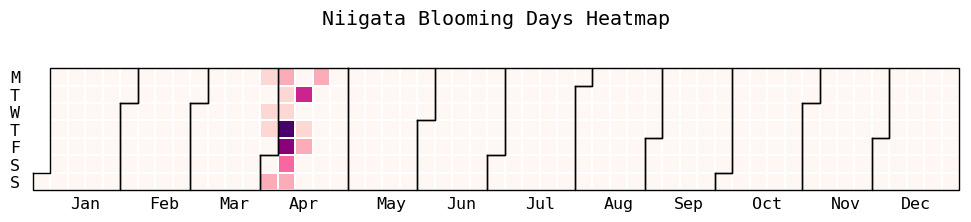

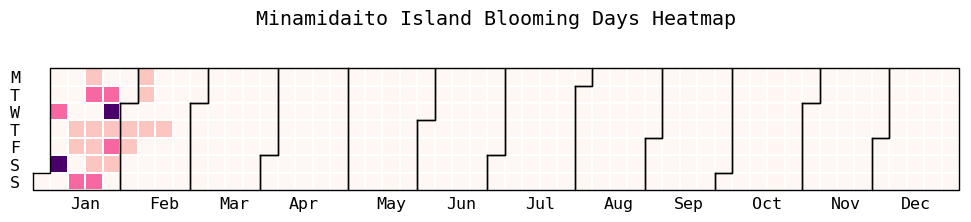

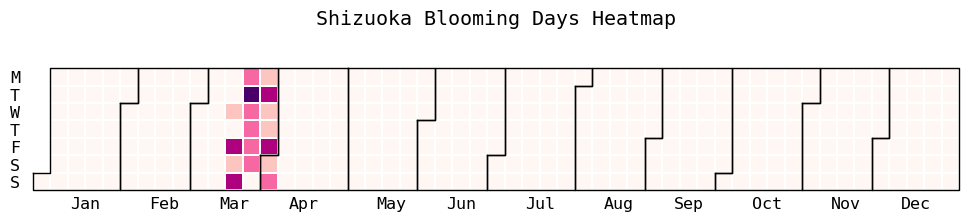

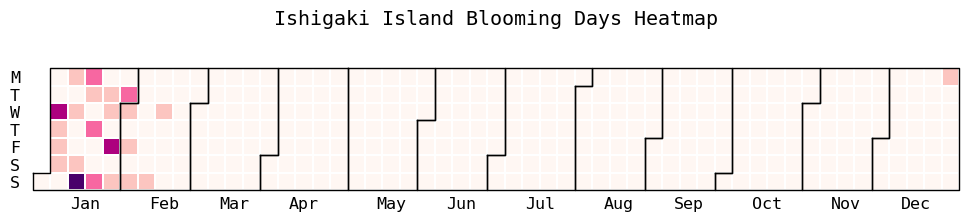

In [22]:
# Randomly select 10 locations
np.random.seed(42)  
selected_locations = np.random.choice(data['Location'].unique(), size=10, replace=False)

# we will use 2023 (not a leap year) as a year 
# because the occurrence of Feb 29 is not significant in our data, and so we get a more uniform representation that aligns most closely with the majority of the years
You prefer a simpler, more uniform representation that aligns most closely with the majority of the years.
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)

# Generate a list of dates from January 1 to Dec 31
dates_flat = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

# Loop over each location and create our heatmap values
for location in selected_locations:
    df_location = data[data['Location'] == location]
    bloom_days = df_location['bloom_day_of_year']
    day_of_year_counts = [0] * 365

    for day in bloom_days:
        day_of_year_counts[int(day) - 1] += 1

    # Generate the heatmap using the july library
    july.heatmap(dates=dates_flat, 
                 data=day_of_year_counts, 
                 cmap='RdPu',
                 month_grid=True, 
                 horizontal=True,
                 value_label=False,
                 date_label=False,
                 weekday_label=True,
                 month_label=True, 
                 year_label=False,
                 colorbar=False,
                 fontfamily="monospace",
                 fontsize=12,
                 title=f'{location} Blooming Days Heatmap',
                 titlesize="large",
                 dpi=100)

Using the july library, I was able to make calendar plots that show the frequency of certain blooming dates for each location. However, because our dataset includes over 50 locations all over Japan, I decided to only plot a defined number (10) of locations at a time for better memory allocation. For reproductive purposes, the 'selected_locations' list can also be easily modified with a custom list of desired locations to be inspected. 

Nonetheless, this plot has shown some interesting insights regarding blooming date distribution and frequency. For instance, we can see that the majority of locations tend to witness the blooming of cherry blossom trees mostly between the end of March and the beginning of April, while other locations such as Naha will possibly have sakura blooms all through January and sometimes already by the end of December. This could be a really good insight for tourists who come every year from all over the world during the spring to witness these natural phenomena, why struggle to book a vacation in Japan during peak season when you can get a headstart already in winter :)

Another interesting insight is that some locations like Abashiri for example seem to have a larger blooming window (throughout the month of May), while other locations like Tsu, have a smaller window (almost 15 days). On top of that, it seems like most locations have one or two days where the peak blooming day was recorded more frequently, this can be a great insight for sakura watchers who are hoping to get a prediction about the next peak blooming day. 